# Yelp Review Classifier
a challenge to implement and explore LSTM and Convolution model over the new Yelp review dataset. You have to fill up all the blanks with the hyperparameters that helps you get the best accuracy and loss.

In [ ]:
##import the required libraries and APIs

import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Downloading the TensorFlow `yelp_popularity_review` dataset

> Make sure tensorflow_datasets is installed

In [ ]:
##load the yelp reviews dataset
data, info = tfds.load('yelp_polarity_reviews', with_info=True, as_supervised=True)

In [ ]:
train_data, test_data = data['train'], data['test']

train_sentences = []
test_sentences = []

train_labels = []
test_labels = []

In [ ]:
# loop to make train sentences and labels
for sentence, label in train_data:
  train_sentences.append(sentence.numpy().decode('utf8'))
  train_labels.append(label.numpy())

# loop to make train sentences and labels
for sentence, label in test_data:
  test_sentences.append(sentence.numpy().decode('utf8'))
  test_labels.append(label.numpy())

In [ ]:
# convert into numpy arrays
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [ ]:
# find out about max length of sentences
# max_length = max([len(line) for line in train_sentences])

In [ ]:
##define the parameters for tokenizing and padding
vocab_size = 10000
oov_token = '<OOV>'
# max_length = max_length
max_length = 120
padding_type = 'post'
truncating_type = 'post'
embedding_dim = 16

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

# Training Sequences and Padding
training_sequences = tokenizer.texts_to_sequences(train_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

# Testing Sequences and Padding
testing_sequences = tokenizer.texts_to_sequences(test_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=truncating_type)

## Explore the LSTM & CNN model with the following layers:
1. Embedding layer
2. Try two bidirectional LSTM layers or a Conv1D layer or both.
3. Dense layer with 24 nodes
4. Output Dense layer with `sigmoid` activation 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           160000    
                                                                 
 bidirectional (Bidirectiona  (None, 120, 128)         41472     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 244,801
Trainable params: 244,801
Non-trai

In [ ]:
num_epochs = 10

history = model.fit(training_padded, train_labels,
                    validation_data=(testing_padded, test_labels),
                    epochs=num_epochs)

Epoch 1/10
17500/17500 [==============================] - 348s 19ms/step - loss: 0.2320 - accuracy: 0.9045 - val_loss: 0.1764 - val_accuracy: 0.9295
Epoch 2/10
17500/17500 [==============================] - 335s 19ms/step - loss: 0.1602 - accuracy: 0.9362 - val_loss: 0.1558 - val_accuracy: 0.9402
Epoch 3/10
17500/17500 [==============================] - 335s 19ms/step - loss: 0.1400 - accuracy: 0.9452 - val_loss: 0.1491 - val_accuracy: 0.9415
Epoch 4/10
17500/17500 [==============================] - 334s 19ms/step - loss: 0.1256 - accuracy: 0.9516 - val_loss: 0.1525 - val_accuracy: 0.9415
Epoch 5/10
17500/17500 [==============================] - 334s 19ms/step - loss: 0.1133 - accuracy: 0.9569 - val_loss: 0.1542 - val_accuracy: 0.9415
Epoch 6/10
17500/17500 [==============================] - 343s 20ms/step - loss: 0.1016 - accuracy: 0.9620 - val_loss: 0.1548 - val_accuracy: 0.9392
Epoch 7/10
17500/17500 [==============================] - 333s 19ms/step - loss: 0.0906 - accuracy: 0.9667

## Visualise the accuracy and loss

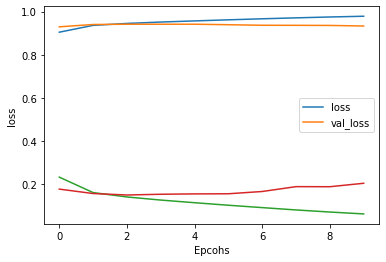

In [ ]:
import matplotlib.pyplot as plt

def plot_metrics(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric])
  plt.xlabel('Epcohs')
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  plt.plot()


plot_metrics(history, 'accuracy')
plot_metrics(history, 'loss')

## Classify new reviews

In [ ]:
sentence = ["the restaurant served a delicious pasta", "the restaurant didn't have a decent ambience"]

sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, max_length, padding=padding_type, truncating=truncating_type)

print(model.predict(padded))

[[9.5849210e-01]
 [6.1190553e-04]]
